# Simple Linear Regression 

Welcome to first programming assignment! We will build a linear regression algorithm to predict output value Y. 

**Instructions:**
- Do not use loops (for/while) in  code, unless the instructions explicitly ask you to do so.

**We will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that we will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [245]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**:  Predict Value of Y for given number X :
    - an input data of (i,1) shape
    - a output data of (i,1) shape
 

We will build a simple linear regression algorithm using gradient decent to predict correct value of Y.

Let's get more familiar with the dataset. Load the data by running the following code.

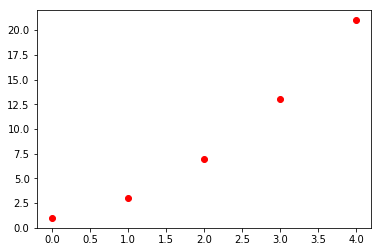

In [246]:
X = np.array([0,1,2,3,4])
#Y = np.array([10,0,20,70,80])
Y = np.array([1,3,7,13,21])

plt.plot(X,Y,'ro')

## 3 - Building the parts of our algorithm ## 

The main steps for building a linear regression are:
### The algorithm
In each step of the gradient descent we will do the following:

1. Intialize current slope(w1) and intercept(w0).

2. Compute the predicted values given the current slope(w1) and intercept(w0)
    - For one example $x^{(i)}$, $$ \hat y^{(i)} = (w1 x^{(i)} + w0) \tag{1}$$

3. Compute the sum of errors, $$ E = \sum_{i=1}^N (y^{(i)} - (w1 x^{(i)} + w0))^2 \tag{2}$$

4. Update the intercept(w0):
    - compute the derivative  $$ \frac{\partial E}{\partial w0} = -2 \sum_{i=1}^N (y^{(i)} - (w1 x^{(i)} + w0)) \tag{3}$$       
    - compute the w0 as step_size times the derivative  $$ w0 = w0 - stepsize * dw0 \tag{4}$$

5. Update the slope:
    - compute the derivative: $$ \frac{\partial E}{\partial w1} = -2 \sum_{i=1}^N ((y^{(i)} - (w1 x^{(i)} + w0)) * x^{(i)} )  \tag{5}$$       
    - compute the adjustment as step_size times the derivative
    - decrease the slope by the adjustment
6. Compute the magnitude of the gradient

7. Check for convergence


### 3.1 - Initializing parameters

Let's initialize w0 and w1 as 0. 

In [247]:
#initial values of regression constansts

def initialize_parameters():
    w0 = 0
    w1 = 0
    #step_size=0.0025
    step_size=0.0025
    tolerance=0.01
    return w0,w1,step_size,tolerance



Compute the sum of errors as cost.

In [248]:
def magnitude(dw0, dw1):
    return  math.sqrt((dw0**2+dw1**2))
    

In [249]:
def compute_derivatives(w0, w1,X,Y):
    error =  Y - ( (w1*X) + w0)
    dw0 = np.sum((-2)* error)
    dw1 = np.sum ((-2) * error*X)
    return dw0,dw1


In [250]:
def optimization(X,Y):
    parameters = initialize_parameters()
    w0 = parameters[0]
    w1 = parameters[1]
    step_size = parameters[2]
    tolerance = parameters[3]
            
    while True:
        derivatives = compute_derivatives(w0,w1,X,Y) 
        dw0 = derivatives[0]
        dw1 = derivatives[1]
        w1 = w1 - (step_size * dw1)
        w0 = w0 - (step_size * dw0)
        if magnitude(dw0,dw1) < tolerance :
            break;

        
    print ('Final Parameters:(w1,w0):', w1,',',w0)
    return w0,w1;
    

In [251]:
params = optimization(X,Y)

Final Parameters:(w1,w0): 4.998903636904922 , -0.9968745088543737


[-0.99687451  4.00202913  9.00093276 13.9998364  18.99874004]


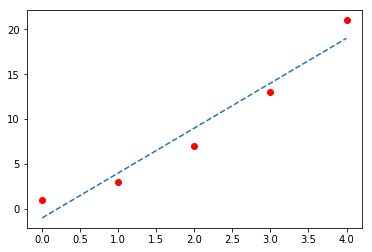

In [252]:
    plt.plot(X,Y,'ro')
    Y_new = params[0] + params[1] * X
    print(Y_new)
    plt.plot(X, Y_new, '--')